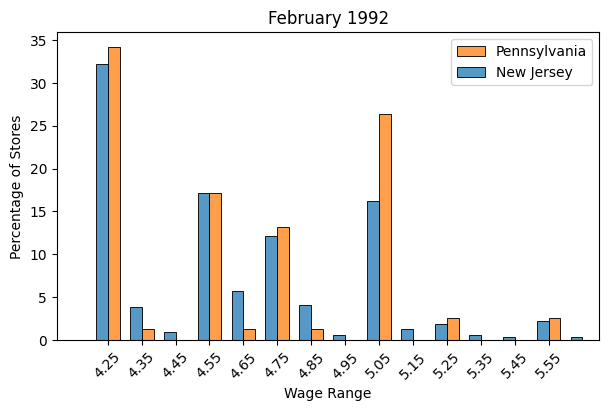

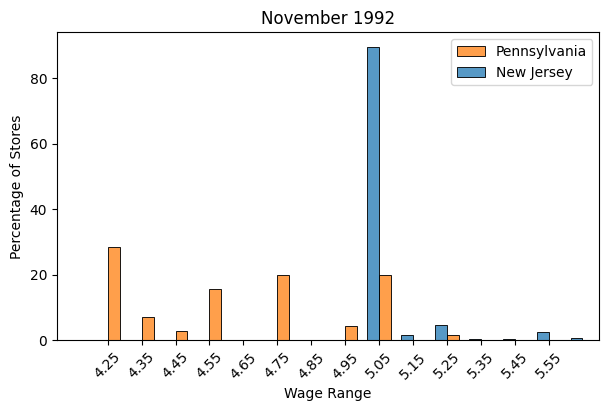

In [1]:
### Question 1 ###

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_stata('assignment8.dta')
pre_data = data[data['time']==0]
post_data = data[data['time']==1]

# February 1992
plt.figure(figsize=(7,4))
sns.histplot(pre_data, x='wage_st', hue='state', multiple='dodge', 
            shrink=0.7, stat='percent', binwidth=0.1,
            binrange=(4,6), common_norm=False, hue_order=[1,0])
plt.legend(labels=['Pennsylvania', 'New Jersey'])
plt.xlim([4.1,5.7])
plt.xticks([num/100 for num in range(425,565,10)])
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Wage Range')
plt.ylabel('Percentage of Stores')
plt.title('February 1992')
plt.show()

# November 1992
plt.figure(figsize=(7,4))
sns.histplot(post_data, x='wage_st', hue='state', multiple='dodge', 
            shrink=0.7, stat='percent', binwidth=0.1,
            binrange=(4,6), common_norm=False, hue_order=[1,0])
plt.legend(labels=['Pennsylvania', 'New Jersey'])
plt.xlim([4.1,5.7])
plt.xticks([num/100 for num in range(425,565,10)])
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Wage Range')
plt.ylabel('Percentage of Stores')
plt.title('November 1992')
plt.show()

In [2]:
### Question 2 ###

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

data = pd.read_stata('assignment8.dta')
wide_data = data.pivot(
    index='store', 
    columns='time', 
    values=['empft', 'state', 'chain', 'co_owned']
)

wide_data.columns = [f'{col[0]}_{int(col[1])}' for col in wide_data.columns]

wide_data['change_empft'] = wide_data['empft_1'] - wide_data['empft_0']

wide_data['state'] = wide_data['state_1']
wide_data['chain'] = wide_data['chain_1']      
wide_data['co_owned'] = wide_data['co_owned_1']

df_reg = wide_data.dropna(subset=['change_empft', 'state', 'chain', 'co_owned'])

formula = "change_empft ~ state + C(chain) + co_owned"

model_col_ii = smf.ols(formula=formula, data=df_reg).fit()

print(model_col_ii.summary())

                            OLS Regression Results                            
Dep. Variable:           change_empft   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.301
Date:                Tue, 02 Dec 2025   Prob (F-statistic):             0.0443
Time:                        12:10:54   Log-Likelihood:                -1467.0
No. Observations:                 392   AIC:                             2946.
Df Residuals:                     386   BIC:                             2970.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2603      1.335     

In [3]:
### Question 2. Column i ###

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

data = pd.read_stata('assignment8.dta')
wide_data = data.pivot(
    index='store', 
    columns='time', 
    values=['empft', 'state', 'chain', 'co_owned', 'emppt']
)

wide_data.columns = [f'{col[0]}_{int(col[1])}' for col in wide_data.columns]

wide_data['fte_0'] = wide_data['empft_0'] + 0.5 * wide_data['emppt_0']
wide_data['fte_1'] = wide_data['empft_1'] + 0.5 * wide_data['emppt_1']

wide_data['change_fte'] = wide_data['fte_1'] - wide_data['fte_0']

wide_data['state'] = wide_data['state_1']
wide_data['chain'] = wide_data['chain_1']      
wide_data['co_owned'] = wide_data['co_owned_1']

df_reg = wide_data.dropna(subset=['change_fte', 'state'])

formula = "change_fte ~ state"

model_col_i = smf.ols(formula=formula, data=df_reg).fit()

print('======= Column i =======')
print(model_col_i.summary())

======= Column i =======
                            OLS Regression Results                            
Dep. Variable:             change_fte   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     6.869
Date:                Tue, 02 Dec 2025   Prob (F-statistic):            0.00911
Time:                        12:10:54   Log-Likelihood:                -1403.5
No. Observations:                 391   AIC:                             2811.
Df Residuals:                     389   BIC:                             2819.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4901      

In [8]:
### Question 2. Column ii ###

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

data = pd.read_stata('assignment8.dta')
wide_data = data.pivot(
    index='store', 
    columns='time', 
    values=['empft', 'state', 'chain', 'co_owned', 'emppt']
)

wide_data.columns = [f'{col[0]}_{int(col[1])}' for col in wide_data.columns]

wide_data['fte_0'] = wide_data['empft_0'] + 0.5 * wide_data['emppt_0']
wide_data['fte_1'] = wide_data['empft_1'] + 0.5 * wide_data['emppt_1']

wide_data['change_fte'] = wide_data['fte_1'] - wide_data['fte_0']

wide_data['state'] = wide_data['state_1']
wide_data['chain'] = wide_data['chain_1']      
wide_data['co_owned'] = wide_data['co_owned_1']

df_reg = wide_data.dropna(subset=['change_fte', 'state'])

formula = "change_fte ~ state + chain + co_owned"

model_col_ii = smf.ols(formula=formula, data=df_reg).fit()

print('======= Column ii =======')
print(model_col_ii.summary())

======= Column ii =======
                            OLS Regression Results                            
Dep. Variable:             change_fte   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.753
Date:                Tue, 02 Dec 2025   Prob (F-statistic):             0.0424
Time:                        13:03:45   Log-Likelihood:                -1402.7
No. Observations:                 391   AIC:                             2813.
Df Residuals:                     387   BIC:                             2829.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5017     

In [7]:
### Question 3 ###

import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

data = pd.read_stata('assignment8.dta')
wide_data = data.pivot(
    index='store', 
    columns='time')

wide_data.columns = [f'{col[0]}_{int(col[1])}' for col in wide_data.columns]

wide_data['pricemeal_0'] = wide_data['pricesoda_0'] + wide_data['pricefry_0'] + wide_data['priceentree_0']
wide_data['pricemeal_1'] = wide_data['pricesoda_1'] + wide_data['pricefry_1'] + wide_data['priceentree_1']

wide_data['change_price'] = wide_data['pricemeal_1'] - wide_data['pricemeal_0']


wide_data['state'] = wide_data['state_1']
wide_data['chain'] = wide_data['chain_1']      
wide_data['co_owned'] = wide_data['co_owned_1']

formula = "change_price ~ state"

model_col_i = smf.ols(formula=formula, data=wide_data).fit()

print('======= Column i =======')
print(model_col_i.summary())

formula = "change_price ~ state + chain + co_owned"

model_col_ii = smf.ols(formula=formula, data=wide_data).fit()

print('\n\n======= Column ii =======')
print(model_col_ii.summary())

======= Column i =======
                            OLS Regression Results                            
Dep. Variable:           change_price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.133
Date:                Tue, 02 Dec 2025   Prob (F-statistic):             0.0428
Time:                        12:45:34   Log-Likelihood:                -145.48
No. Observations:                 356   AIC:                             295.0
Df Residuals:                     354   BIC:                             302.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0340      